# Problem Statement:

To help the CEO of NGO to determine the list of countries which needs immediate aid of funding.

# 1. Read and visualise the data

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# read the dataset

country = pd.read_csv("E:\\clustering assignment\\Country-data.csv")
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country.shape

(167, 10)

In [4]:
# basic info on the dataset 

country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# to check for any null values

country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### No missing values found in our dataset

In [6]:
# checking for outliers

country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# 2. Data Cleaning & Preparation

In [7]:
# reset index

country.set_index('country', inplace=True)
country.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
# Converting health, imports & exports values into % of total gdpp

country['health']=(country['health']*country['gdpp'])/100
country['imports']=(country['imports']*country['gdpp'])/100
country['income']=(country['income']*country['gdpp'])/100
country.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553
Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090
Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460
Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200


### Data Visualisation

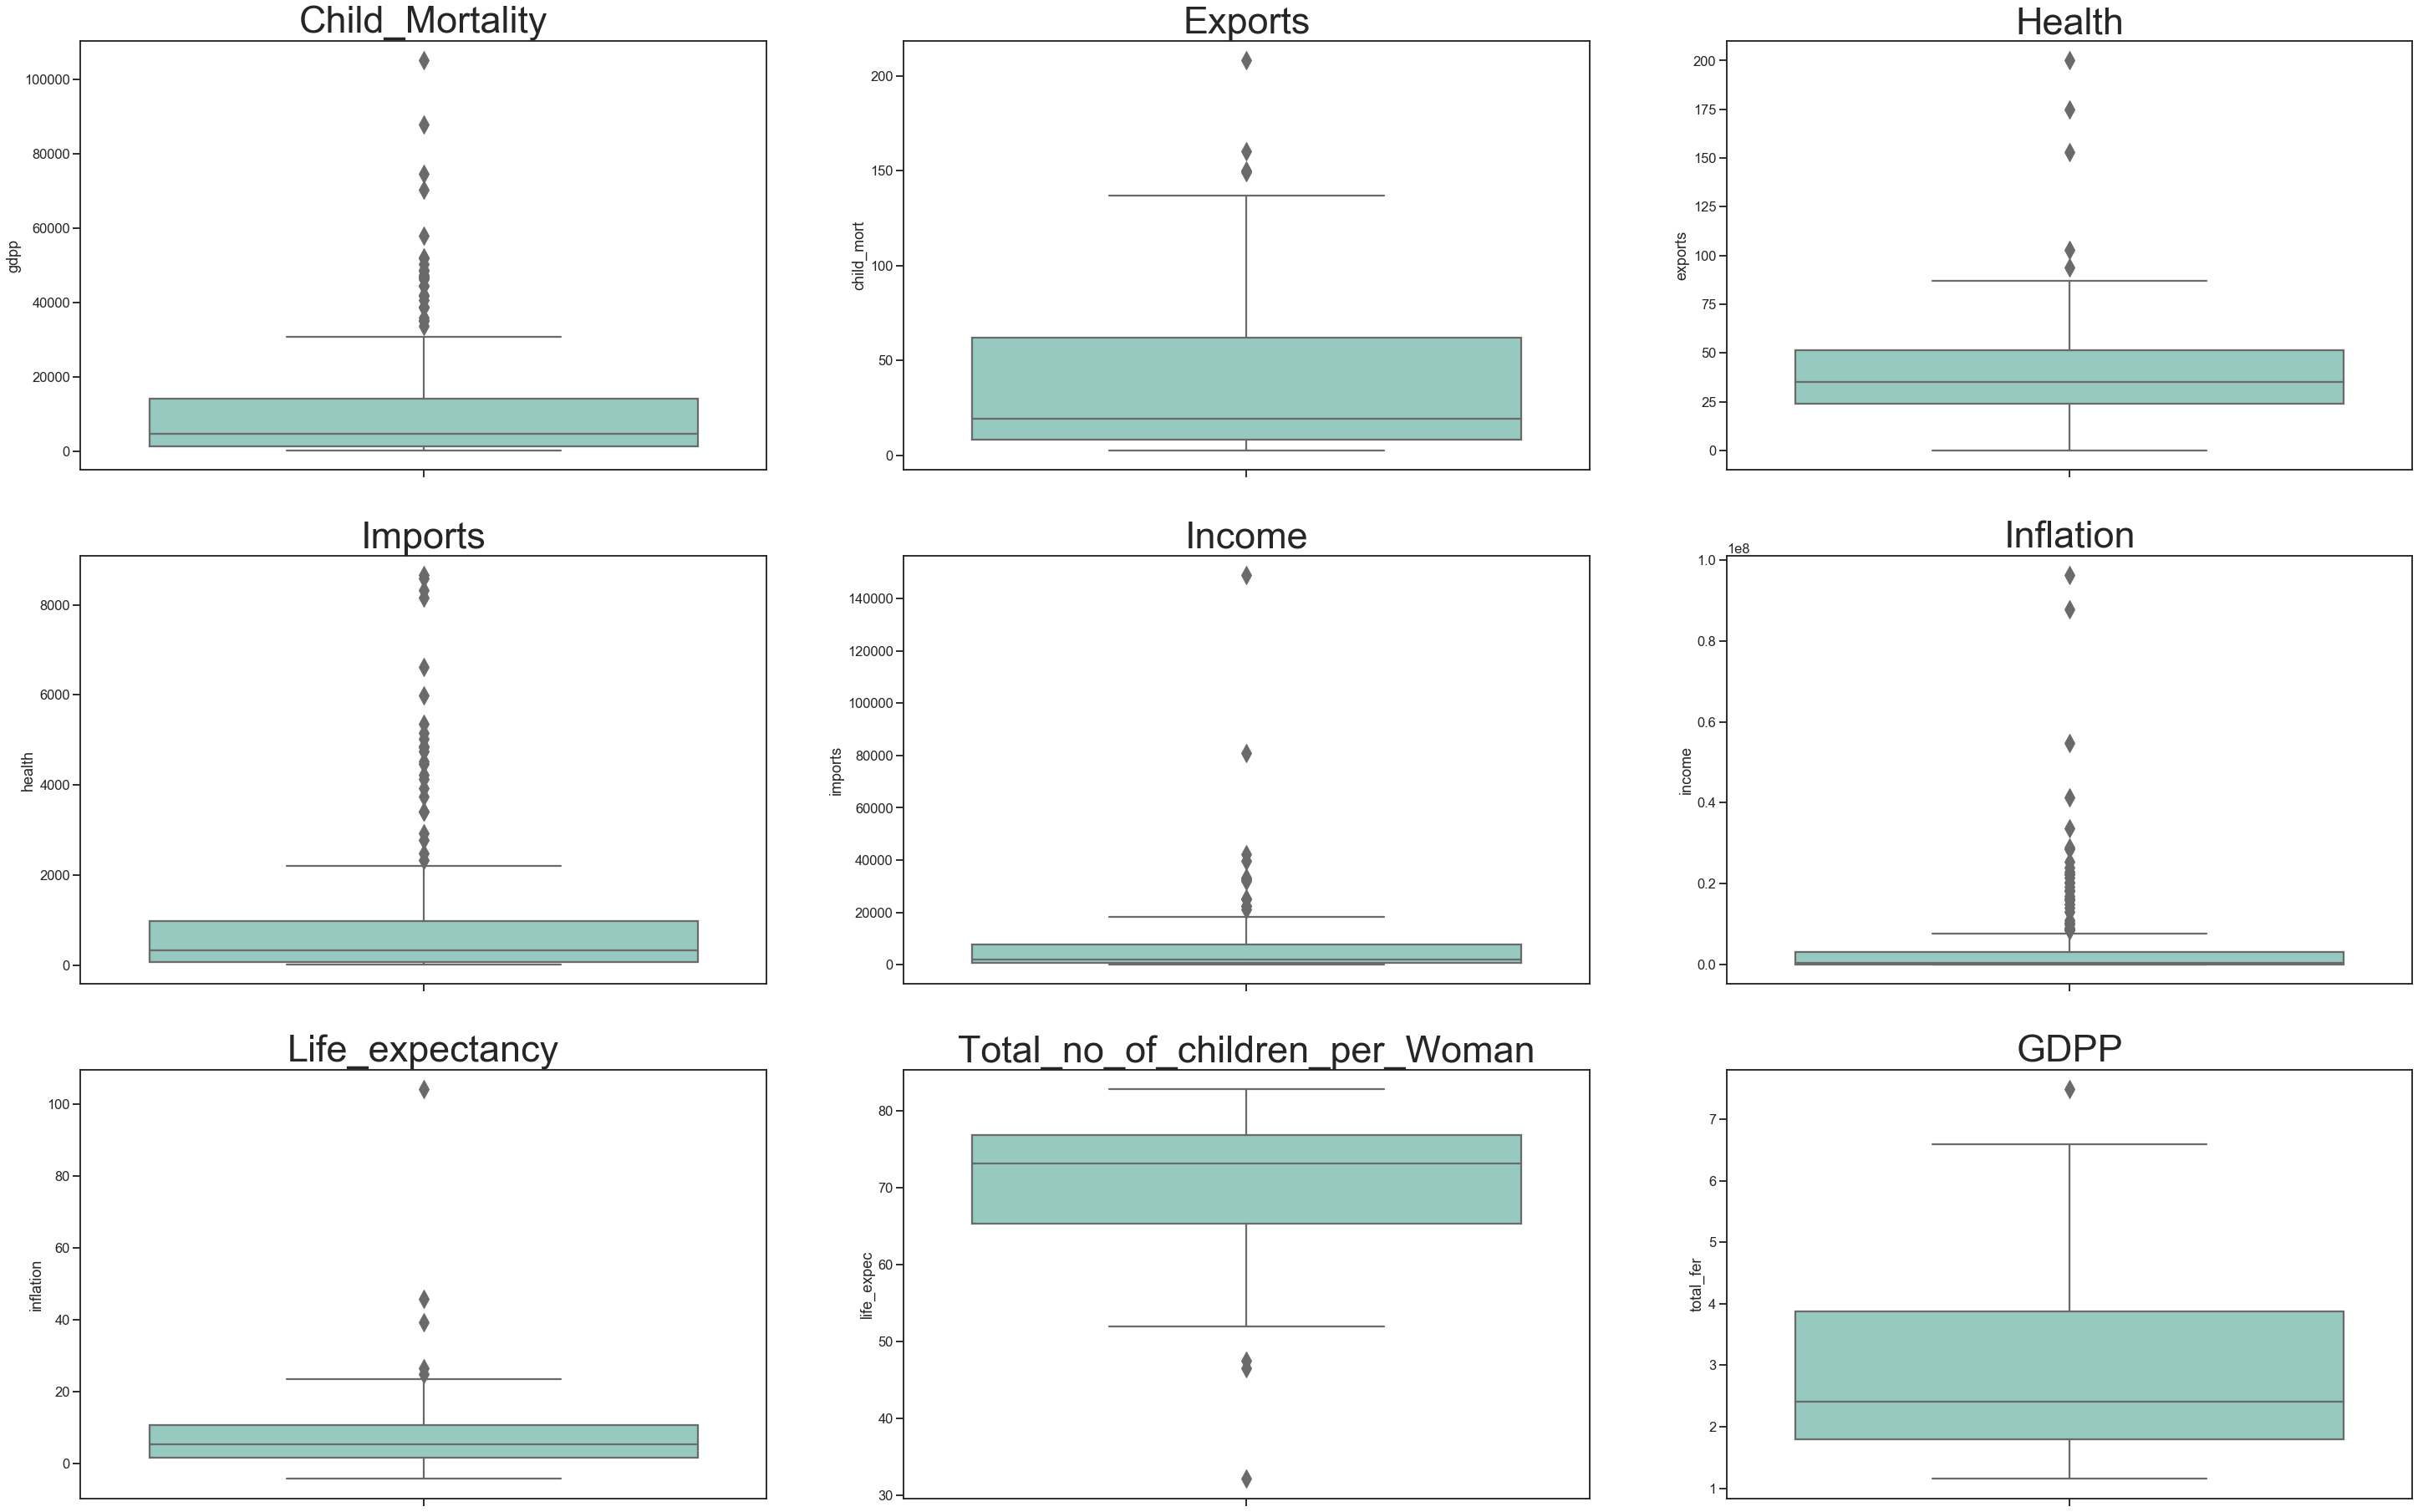

In [9]:
# Lets visualise the data for ay outliers

plt.figure(figsize=(50,100))
plt.tight_layout()
sns.set_style('ticks')
sns.set_context('talk')

col={0:'Child_Mortality',1:'Exports',2:'Health',3:'Imports',4:'Income',5:'Inflation',
     6:'Life_expectancy',7:'Total_no_of_children_per_Woman',8:'GDPP'}

for i in range(9):
    plt.subplot(9,3,i+1)
    plt.title(col[i],fontsize=45)
    sns.boxplot(x=country.columns[i-1],data=country,palette='Set3',orient='v',fliersize=15)

In [10]:
# to check correlations on the data

country.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.430438,-0.319138,-0.325432,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,0.252193,0.702031,0.448012,-0.107294,0.316313,-0.320011,0.418725
health,-0.430438,0.252193,1.000000,0.638581,0.721281,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.702031,0.638581,1.000000,0.782335,-0.179458,0.397515,-0.317061,0.755114
income,-0.325432,0.448012,0.721281,0.782335,1.000000,-0.137295,0.426005,-0.302293,0.900701
inflation,0.288276,-0.107294,-0.253956,-0.179458,-0.137295,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.545626,0.397515,0.426005,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.407984,-0.317061,-0.302293,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.916593,0.755114,0.900701,-0.221631,0.600089,-0.454910,1.000000


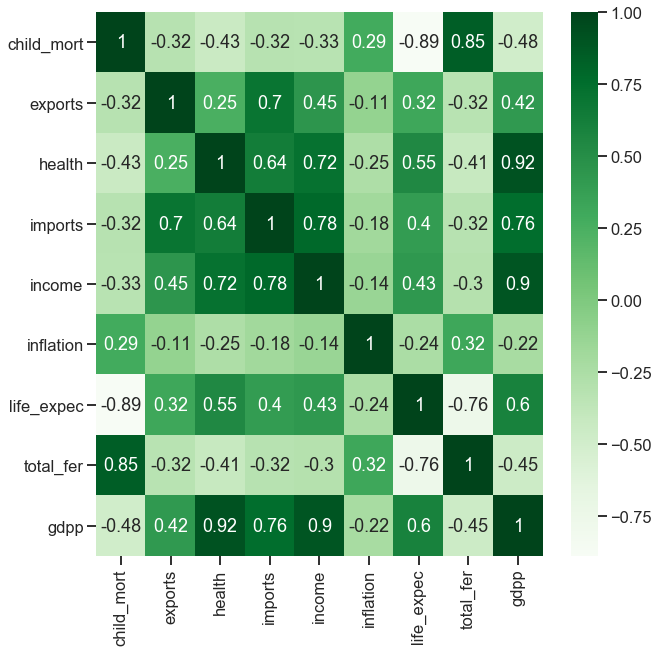

In [11]:
# visualise the correlation

plt.figure(figsize=(10,10))
sns.heatmap(country.corr(),cmap="Greens", annot=True)
plt.show()

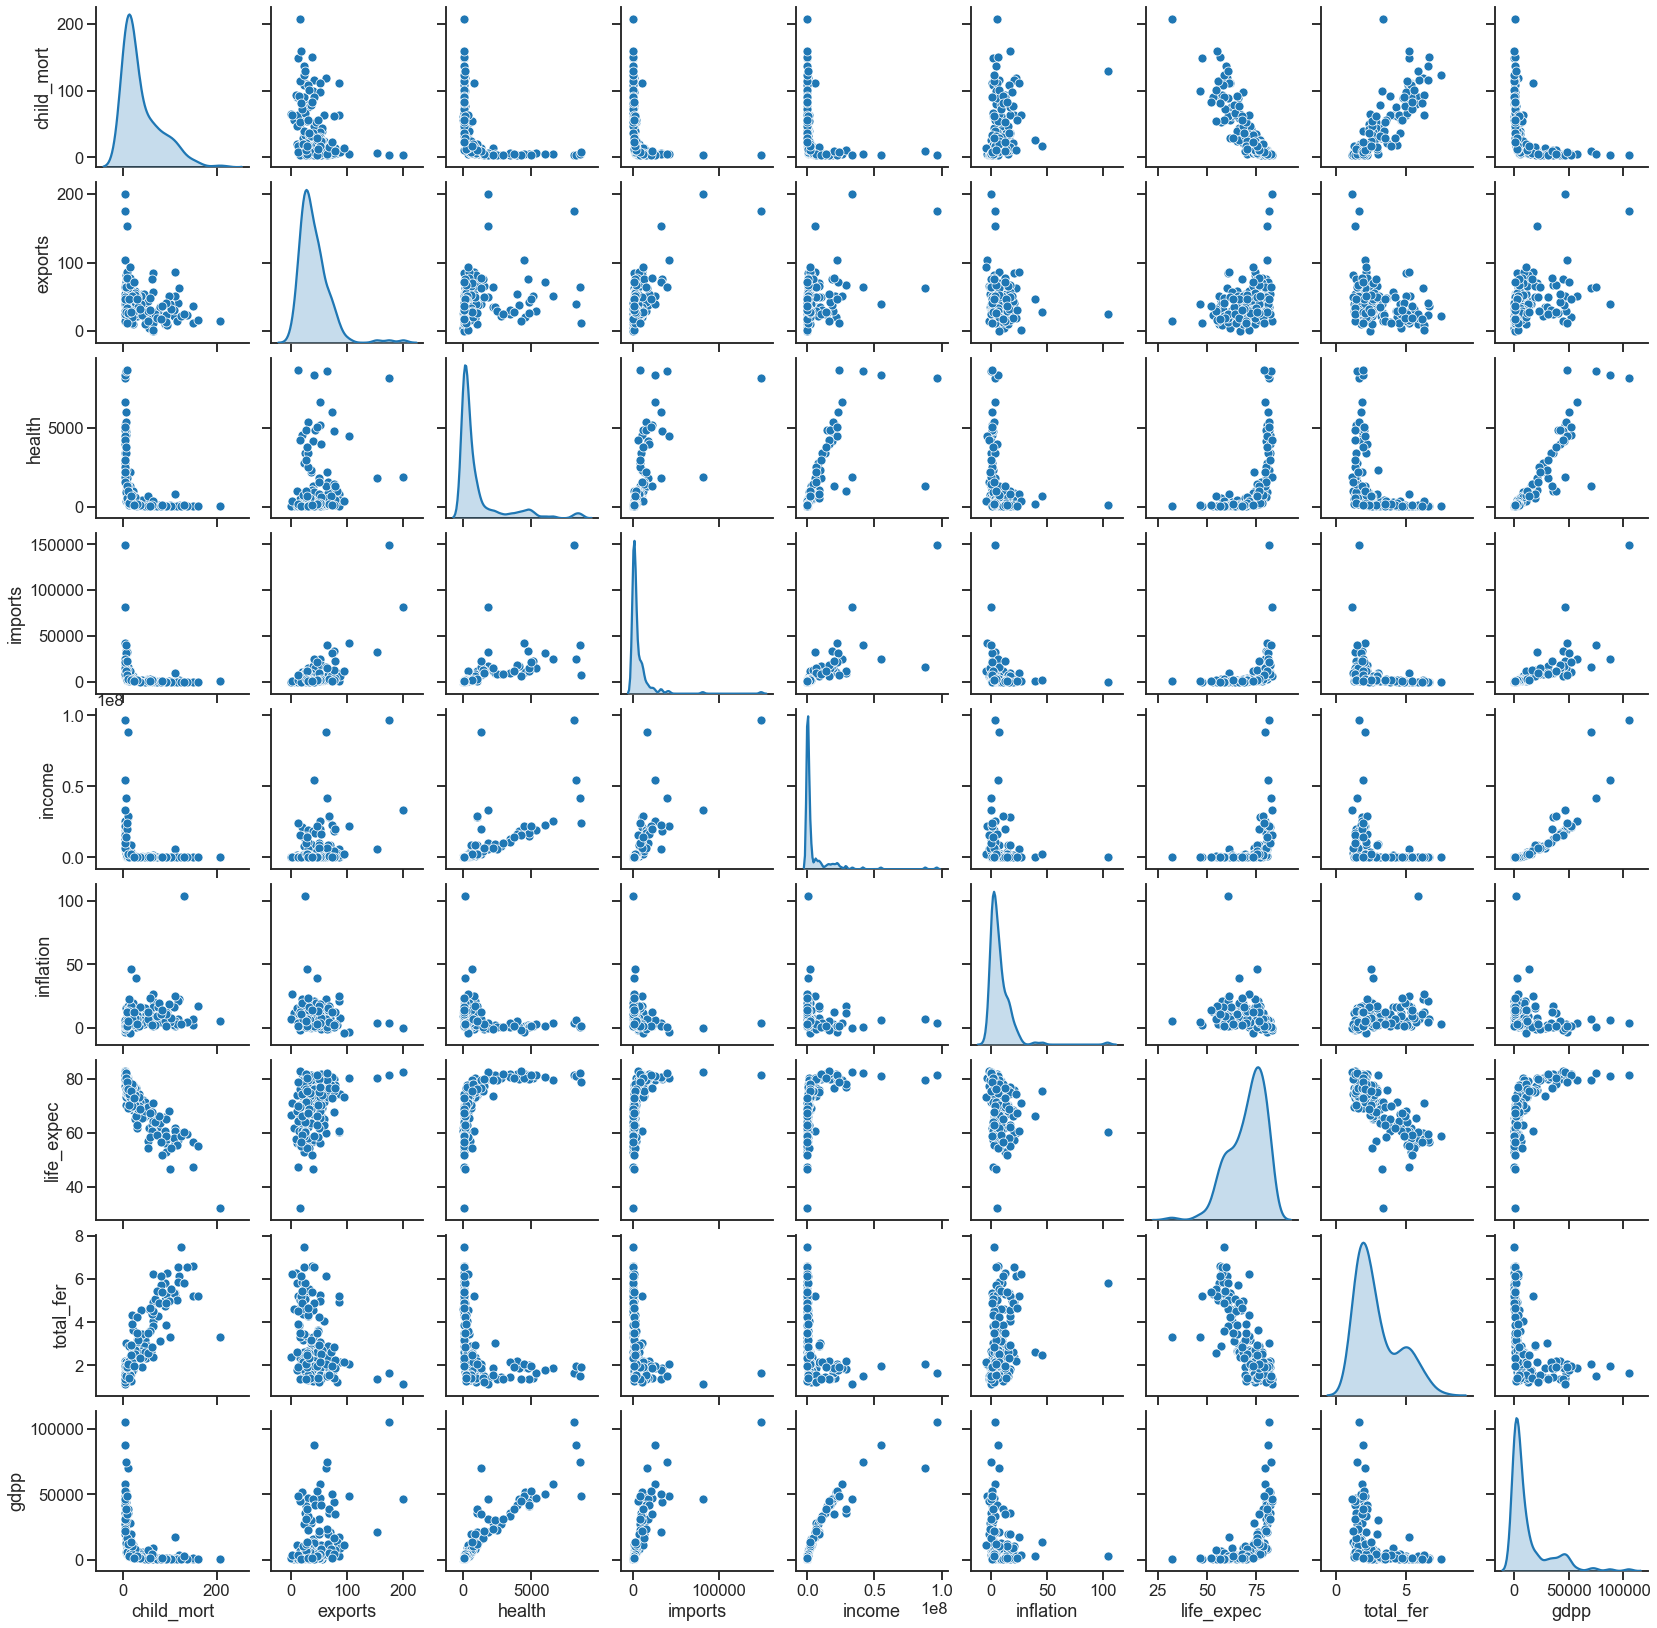

In [12]:
# Visualise the data with a pairplot

sns.pairplot(country,diag_kind='kde')


In [13]:
country.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553
Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090
Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460
Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200


### Rescaling using Power Transformer


We use Power Transfomer from Sklearn to converts the data into specific range which helps in accuracy of clustering algorithms.

In [14]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
scale_data = pd.DataFrame(pt.fit_transform(country))
scale_data.columns= country.columns

In [15]:
scale_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.266699,-1.671164,-1.239313,-1.246055,-1.421814,0.459416,-1.526455,1.544053,-1.462273
1,-0.220994,-0.380078,-0.042924,-0.055108,-0.063615,-0.154659,0.621738,-0.992833,-0.121133
2,0.217834,0.105605,-0.270052,-0.266188,0.065692,1.059790,0.652698,0.313175,-0.063195
3,1.506186,0.943040,-0.661987,-0.219429,-0.308958,1.512843,-1.239045,1.623128,-0.219666
4,-0.637380,0.385850,0.563269,0.758134,0.594623,-0.723442,0.699553,-0.368063,0.609228


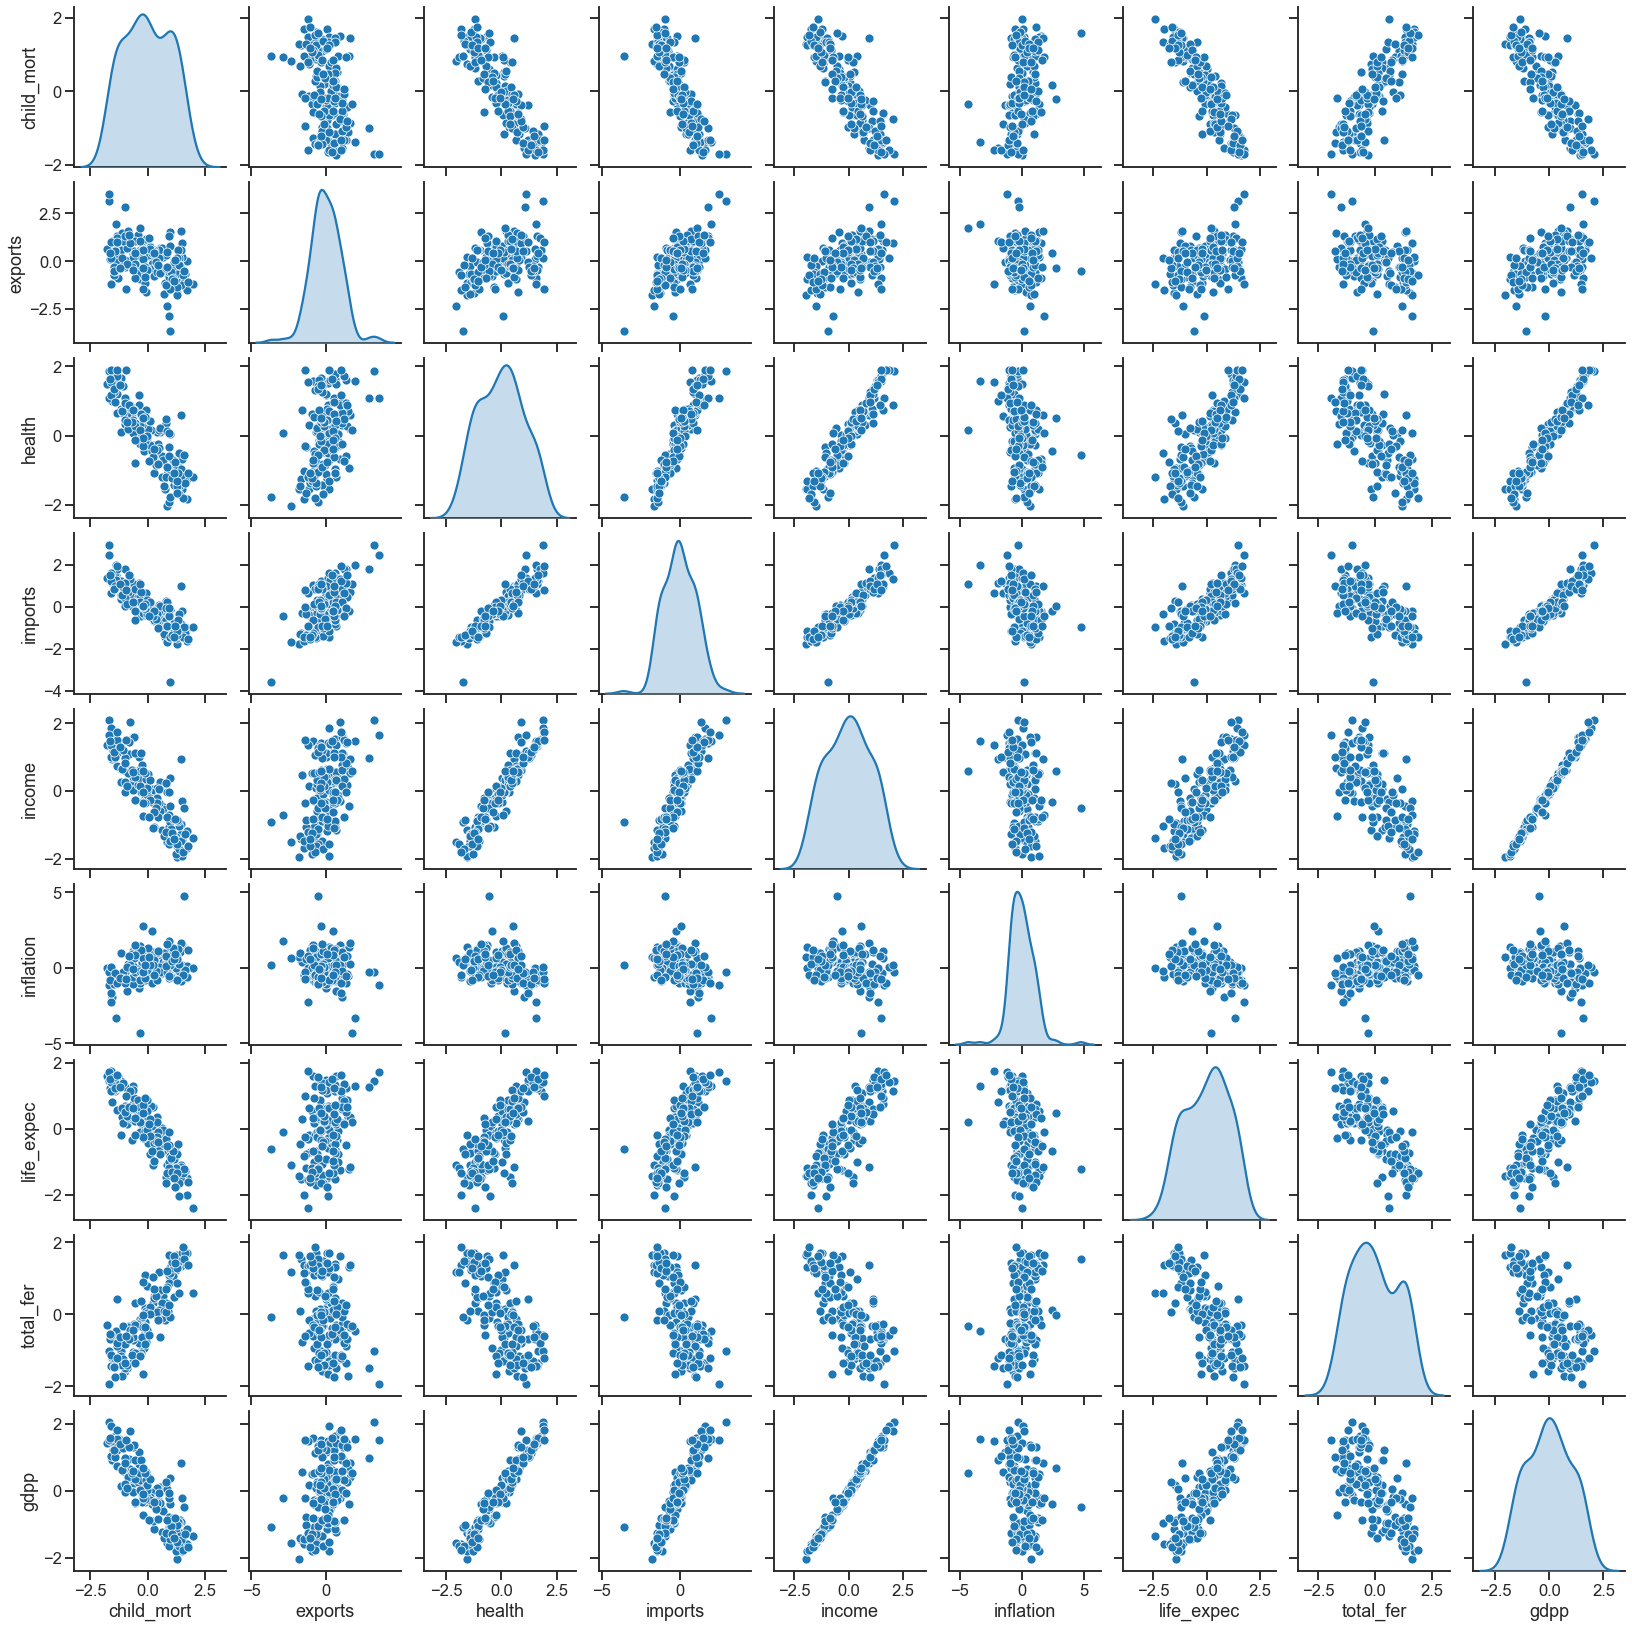

In [16]:
# Visualise the data with a pairplot after scaling

sns.pairplot(scale_data,diag_kind='kde')

#### Here we can very well compare the pairplots of the dataset before and after perfroming the scaling. 

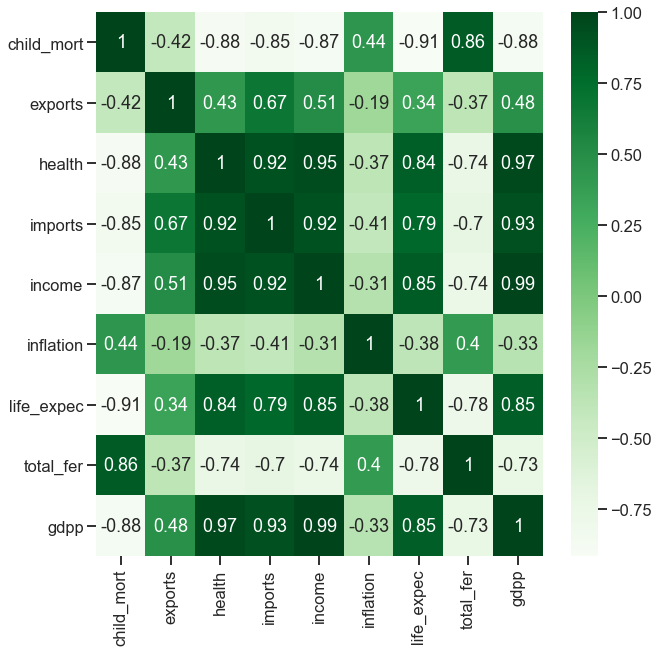

In [17]:
# Again a heatmap to find the correlation after scaling

plt.figure(figsize=(10,10))
sns.heatmap(scale_data.corr(),cmap="Greens", annot=True)
plt.show()

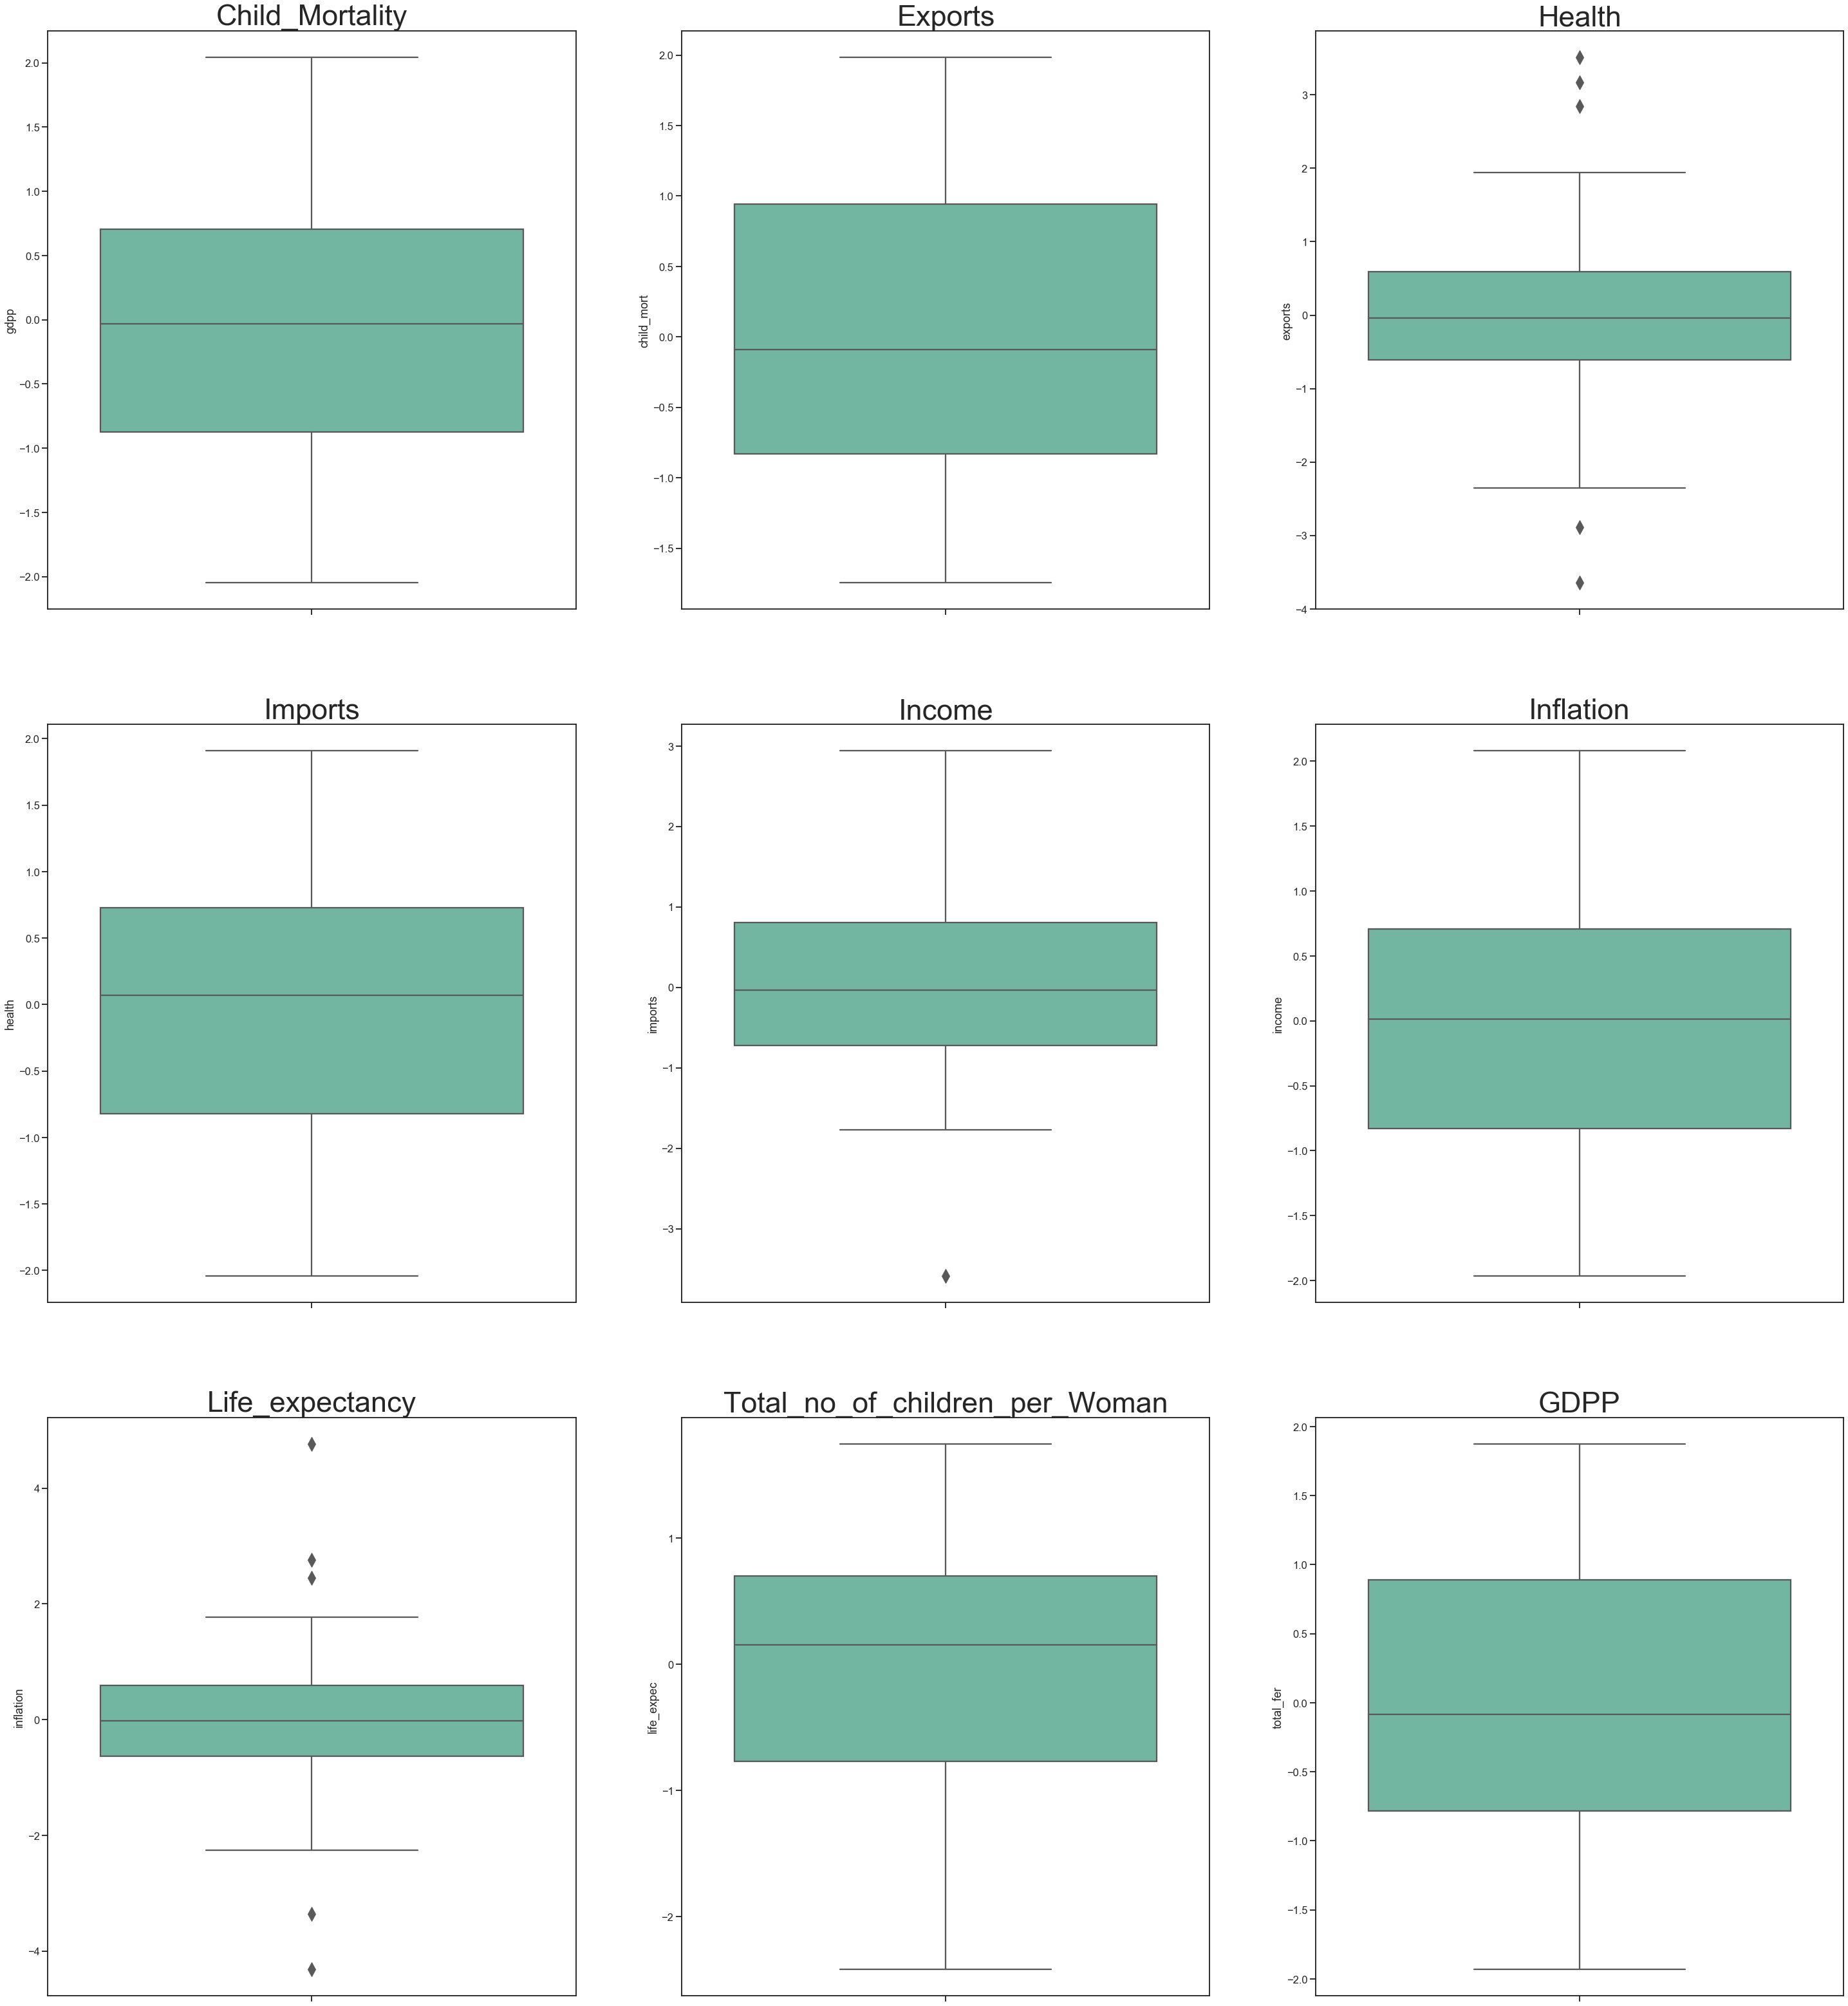

In [18]:
# Lets perform a Outliers Analysis again on the scaled data

plt.figure(figsize=(50,175))
plt.tight_layout()
sns.set_style('ticks',{"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context('talk')

col={0:'Child_Mortality',1:'Exports',2:'Health',3:'Imports',4:'Income',5:'Inflation',
     6:'Life_expectancy',7:'Total_no_of_children_per_Woman',8:'GDPP'}

for i in range(9):
    plt.subplot(9,3,i+1)
    plt.title(col[i],fontsize=45)
    sns.boxplot(x=scale_data.columns[i-1],data=scale_data, palette='Set2',orient='v',fliersize=15)

# 4. K-Means Clustering

K-Means with some arbitrary k-value. K-value is randomly chosen by us. 

### Finding Optimal no of clusters by SSD/ Elbow Curve method:

In [19]:
# k-means with some arbitrary k

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cluster_range = range(1, 15)
cluster_errors = []
ssc = []
for k in cluster_range:
  clusters = KMeans( k, n_init = 100,init='k-means++',random_state=0)
  clusters.fit(scale_data)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
df_cluster = pd.DataFrame( { "k":cluster_range, "cluster_errors": cluster_errors} )
df_cluster[0:10]

,k,cluster_errors
0,1,1503.000000
1,2,720.212709
2,3,505.514009
3,4,447.091330
4,5,411.965557
5,6,377.604514
6,7,345.189975
7,8,324.137697
8,9,304.282670
9,10,284.994785


In [20]:
clusters.labels_

array([11,  2,  6, 13, 10,  2,  6,  1,  5,  6,  1,  3,  4, 10,  6,  5,  8,
       11,  8,  0, 10,  8,  2,  3, 10, 11, 11,  0, 11,  1,  8, 11, 11,  2,
        6,  2, 11, 11, 13,  2,  0, 10,  5,  5,  5,  2,  2,  8,  8, 13,  4,
       10,  8,  5,  1, 13, 11,  6,  5,  0,  1,  2,  8, 11, 11,  8, 11, 10,
        5,  0,  6,  6, 13, 12,  1,  1,  6,  1,  8, 13, 11, 11,  3,  0,  0,
       10, 10,  0, 11,  3, 10,  9, 10, 11, 11,  3, 10, 11,  9,  0, 10,  8,
        6, 13, 10,  8, 11,  4,  8,  4,  5,  1, 11,  7,  5,  3,  4, 10,  8,
        2,  8, 10,  1,  3, 10,  6, 11,  8,  3, 11, 10, 12, 11,  9, 10,  5,
        0,  8,  5,  1,  6,  2,  0,  8,  5,  5,  4, 11, 10,  4, 11,  8, 10,
        2,  8, 11,  6,  3,  1,  1,  2,  0,  8, 13,  6,  0,  0])

In [21]:
cluster_error = df_cluster['cluster_errors']
for i in range(8):
    print(cluster_error[i+1]-cluster_error[i])

-782.7872907286772
-214.6987002396118
-58.42267880613565
-35.125773313598245
-34.36104249735661
-32.41453942272034
-21.05227848069586
-19.855026396631388


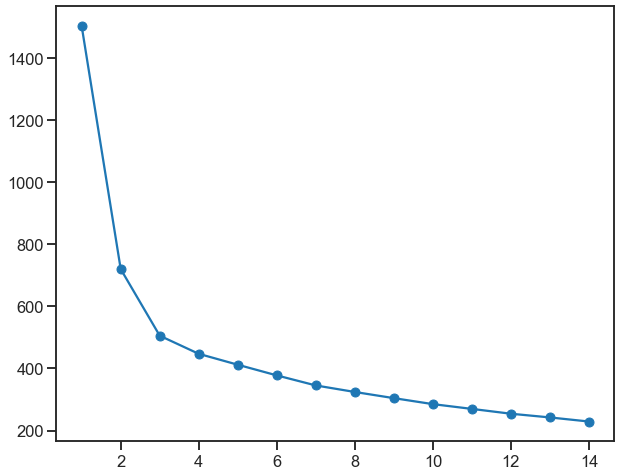

In [22]:
# Elbow plot

plt.figure(figsize=(10,8))
plt.plot( df_cluster.k, df_cluster.cluster_errors, marker = "o" )

we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. 
Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

Hence k-value = 3.


### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [23]:
# silhouette analysis

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scale_data)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scale_data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.4083553693333196
For n_clusters=3, the silhouette score is 0.34850251239362645
For n_clusters=4, the silhouette score is 0.27055929318609956
For n_clusters=5, the silhouette score is 0.2344454824286891
For n_clusters=6, the silhouette score is 0.23939313526530448
For n_clusters=7, the silhouette score is 0.21818647445033376
For n_clusters=8, the silhouette score is 0.2528596315108601


In [24]:
# final model with k=3

kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(scale_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
kmeans.labels_

array([0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 2, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 0, 2, 1,
       0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 0, 2, 2, 2, 0, 0])

In [26]:

scale_data['cluster_id'] = kmeans.labels_
scale_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,1.266699,-1.671164,-1.239313,-1.246055,-1.421814,0.459416,-1.526455,1.544053,-1.462273,0
1,-0.220994,-0.380078,-0.042924,-0.055108,-0.063615,-0.154659,0.621738,-0.992833,-0.121133,2
2,0.217834,0.105605,-0.270052,-0.266188,0.065692,1.059790,0.652698,0.313175,-0.063195,2
3,1.506186,0.943040,-0.661987,-0.219429,-0.308958,1.512843,-1.239045,1.623128,-0.219666,0
4,-0.637380,0.385850,0.563269,0.758134,0.594623,-0.723442,0.699553,-0.368063,0.609228,1


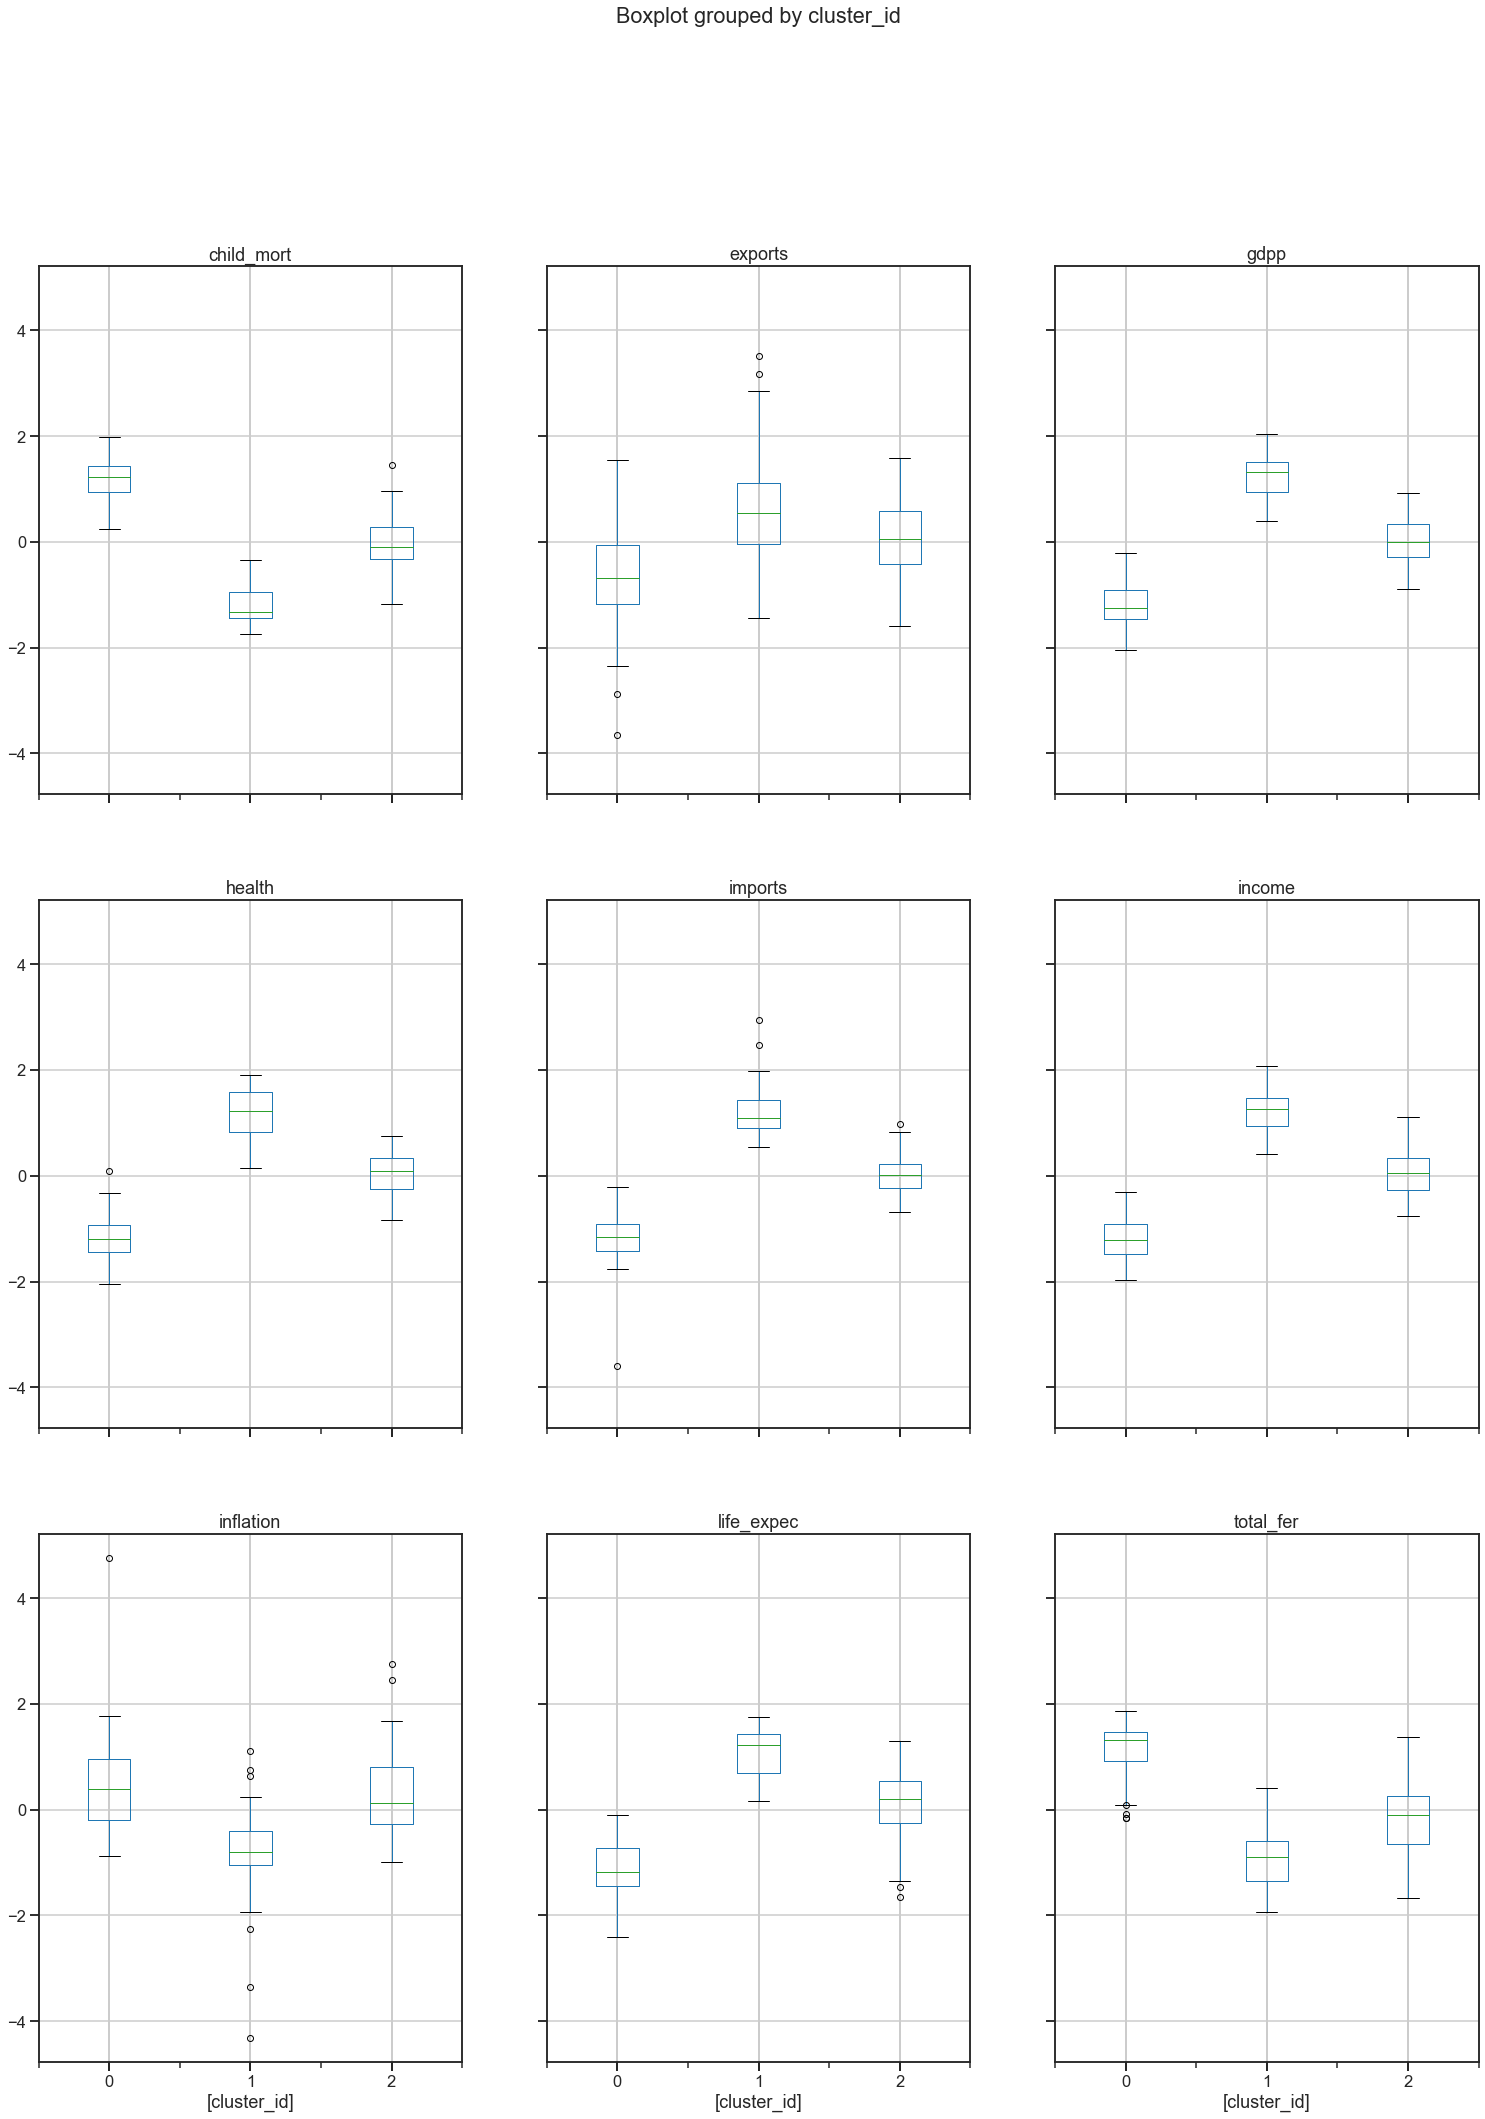

In [27]:
# plot a combined boxplot ny cluster id

scale_data.boxplot(by='cluster_id',layout=(4,3), figsize=(25,45))
plt.show()

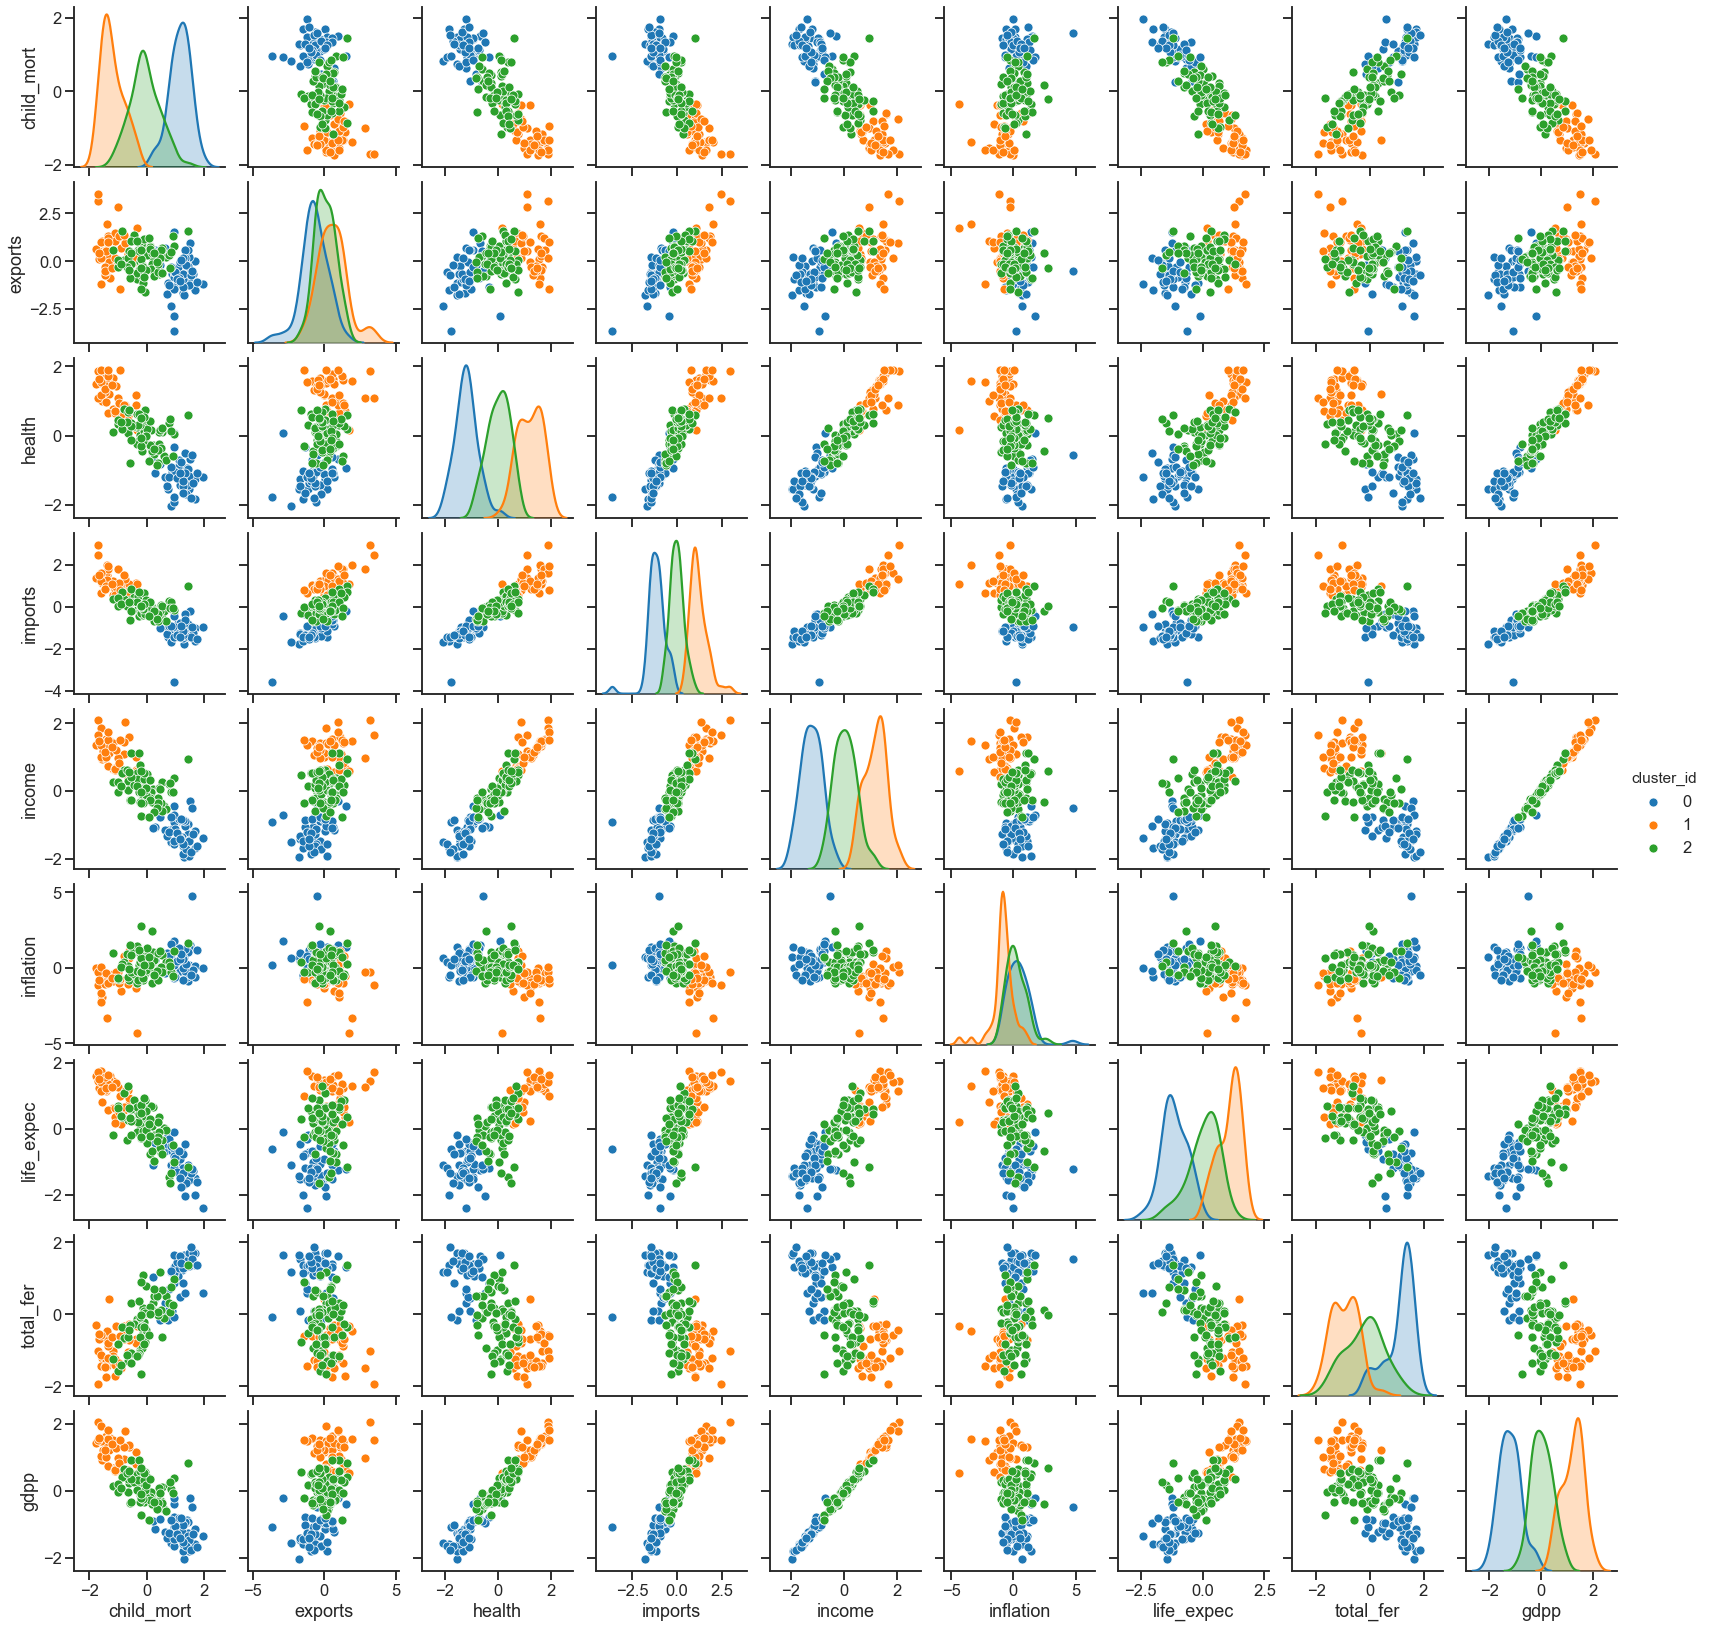

In [28]:
# plotting a pairplot by cluster id

sns.pairplot(scale_data,diag_kind='kde',hue='cluster_id')

In [29]:
scale_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,1.266699,-1.671164,-1.239313,-1.246055,-1.421814,0.459416,-1.526455,1.544053,-1.462273,0
1,-0.220994,-0.380078,-0.042924,-0.055108,-0.063615,-0.154659,0.621738,-0.992833,-0.121133,2
2,0.217834,0.105605,-0.270052,-0.266188,0.065692,1.059790,0.652698,0.313175,-0.063195,2
3,1.506186,0.943040,-0.661987,-0.219429,-0.308958,1.512843,-1.239045,1.623128,-0.219666,0
4,-0.637380,0.385850,0.563269,0.758134,0.594623,-0.723442,0.699553,-0.368063,0.609228,1


In [30]:
country.reset_index(inplace=True)
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553
1,Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200


In [31]:
scale_data['country']=country['country']

In [32]:
scale_data.set_index('country', inplace=True)
scale_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
country,,,,,,,,,,
Afghanistan,1.266699,-1.671164,-1.239313,-1.246055,-1.421814,0.459416,-1.526455,1.544053,-1.462273,0
Albania,-0.220994,-0.380078,-0.042924,-0.055108,-0.063615,-0.154659,0.621738,-0.992833,-0.121133,2
Algeria,0.217834,0.105605,-0.270052,-0.266188,0.065692,1.059790,0.652698,0.313175,-0.063195,2
Angola,1.506186,0.943040,-0.661987,-0.219429,-0.308958,1.512843,-1.239045,1.623128,-0.219666,0
Antigua and Barbuda,-0.637380,0.385850,0.563269,0.758134,0.594623,-0.723442,0.699553,-0.368063,0.609228,1


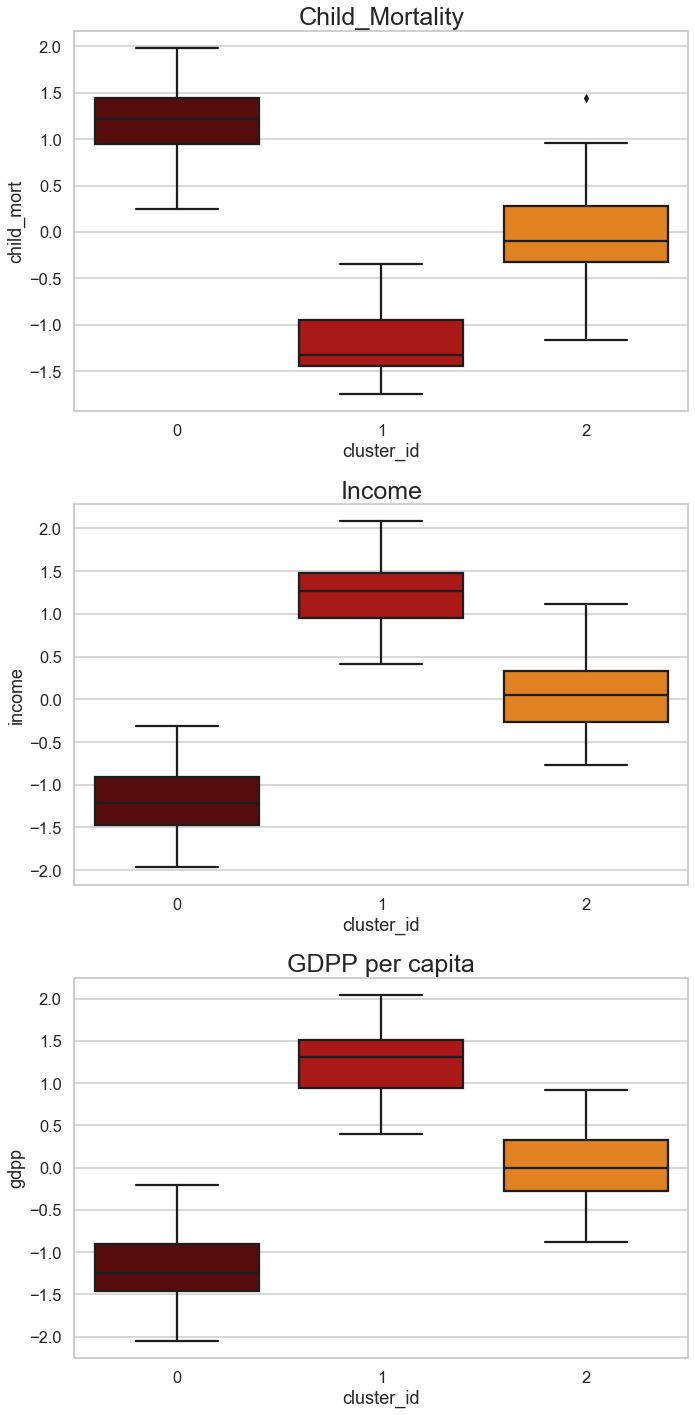

In [33]:
# Lets plot a boxplot to compare three important features

plt.figure(figsize=(10,20))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')
plt.subplot(3,1,1)                          # creating subplots
plt.title('Child_Mortality',fontsize=25)   # giving title with font size

# creating boxplot

sns.boxplot(x=scale_data['cluster_id'],y=scale_data['child_mort'],data=scale_data,palette='gist_heat',orient='v',fliersize=5)

plt.subplot(3,1,2)                         # creating subplots
plt.title('Income',fontsize=25)            # giving title with font size

# creating boxplot
sns.boxplot(x=scale_data['cluster_id'],y=scale_data['income'],data=scale_data,palette='gist_heat',orient='v',fliersize=5)

plt.subplot(3,1,3)                           # creating subplots
plt.title('GDPP per capita',fontsize=25)       # giving title with font size

# creating boxplot
sns.boxplot(x=scale_data['cluster_id'],y=scale_data['gdpp'],data=scale_data,palette='gist_heat',orient='v',fliersize=5)
             
plt.tight_layout()                      # setting the layout for better visual

From the above boxplot we can conclude that 

cluster id 1 : High child mortality and very less Income and GDPP when compared to other cluster id's

In [46]:
Country_aid=pd.DataFrame(scale_data[scale_data['cluster_id']==0].index)

Country_aid.shape

(50, 1)

In [35]:
scale_data.cluster_id.value_counts()

2    70
0    50
1    47
Name: cluster_id, dtype: int64

In [47]:
# List of countries need aid as per the K-Means clustering

Country_aid

,country
0,Afghanistan
1,Angola
2,Bangladesh
3,Benin
4,Burkina Faso
5,Burundi
6,Cambodia
7,Cameroon
8,Central African Republic
9,Chad


## Hierarchical Clustering

Hierarchical cluster analysis is an algorithm that groups similar objects into groups called clusters.

In [37]:
hierarchical_clus= scale_data.drop('cluster_id',1)
hierarchical_clus.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.266699,-1.671164,-1.239313,-1.246055,-1.421814,0.459416,-1.526455,1.544053,-1.462273
Albania,-0.220994,-0.380078,-0.042924,-0.055108,-0.063615,-0.154659,0.621738,-0.992833,-0.121133
Algeria,0.217834,0.105605,-0.270052,-0.266188,0.065692,1.059790,0.652698,0.313175,-0.063195
Angola,1.506186,0.943040,-0.661987,-0.219429,-0.308958,1.512843,-1.239045,1.623128,-0.219666
Antigua and Barbuda,-0.637380,0.385850,0.563269,0.758134,0.594623,-0.723442,0.699553,-0.368063,0.609228


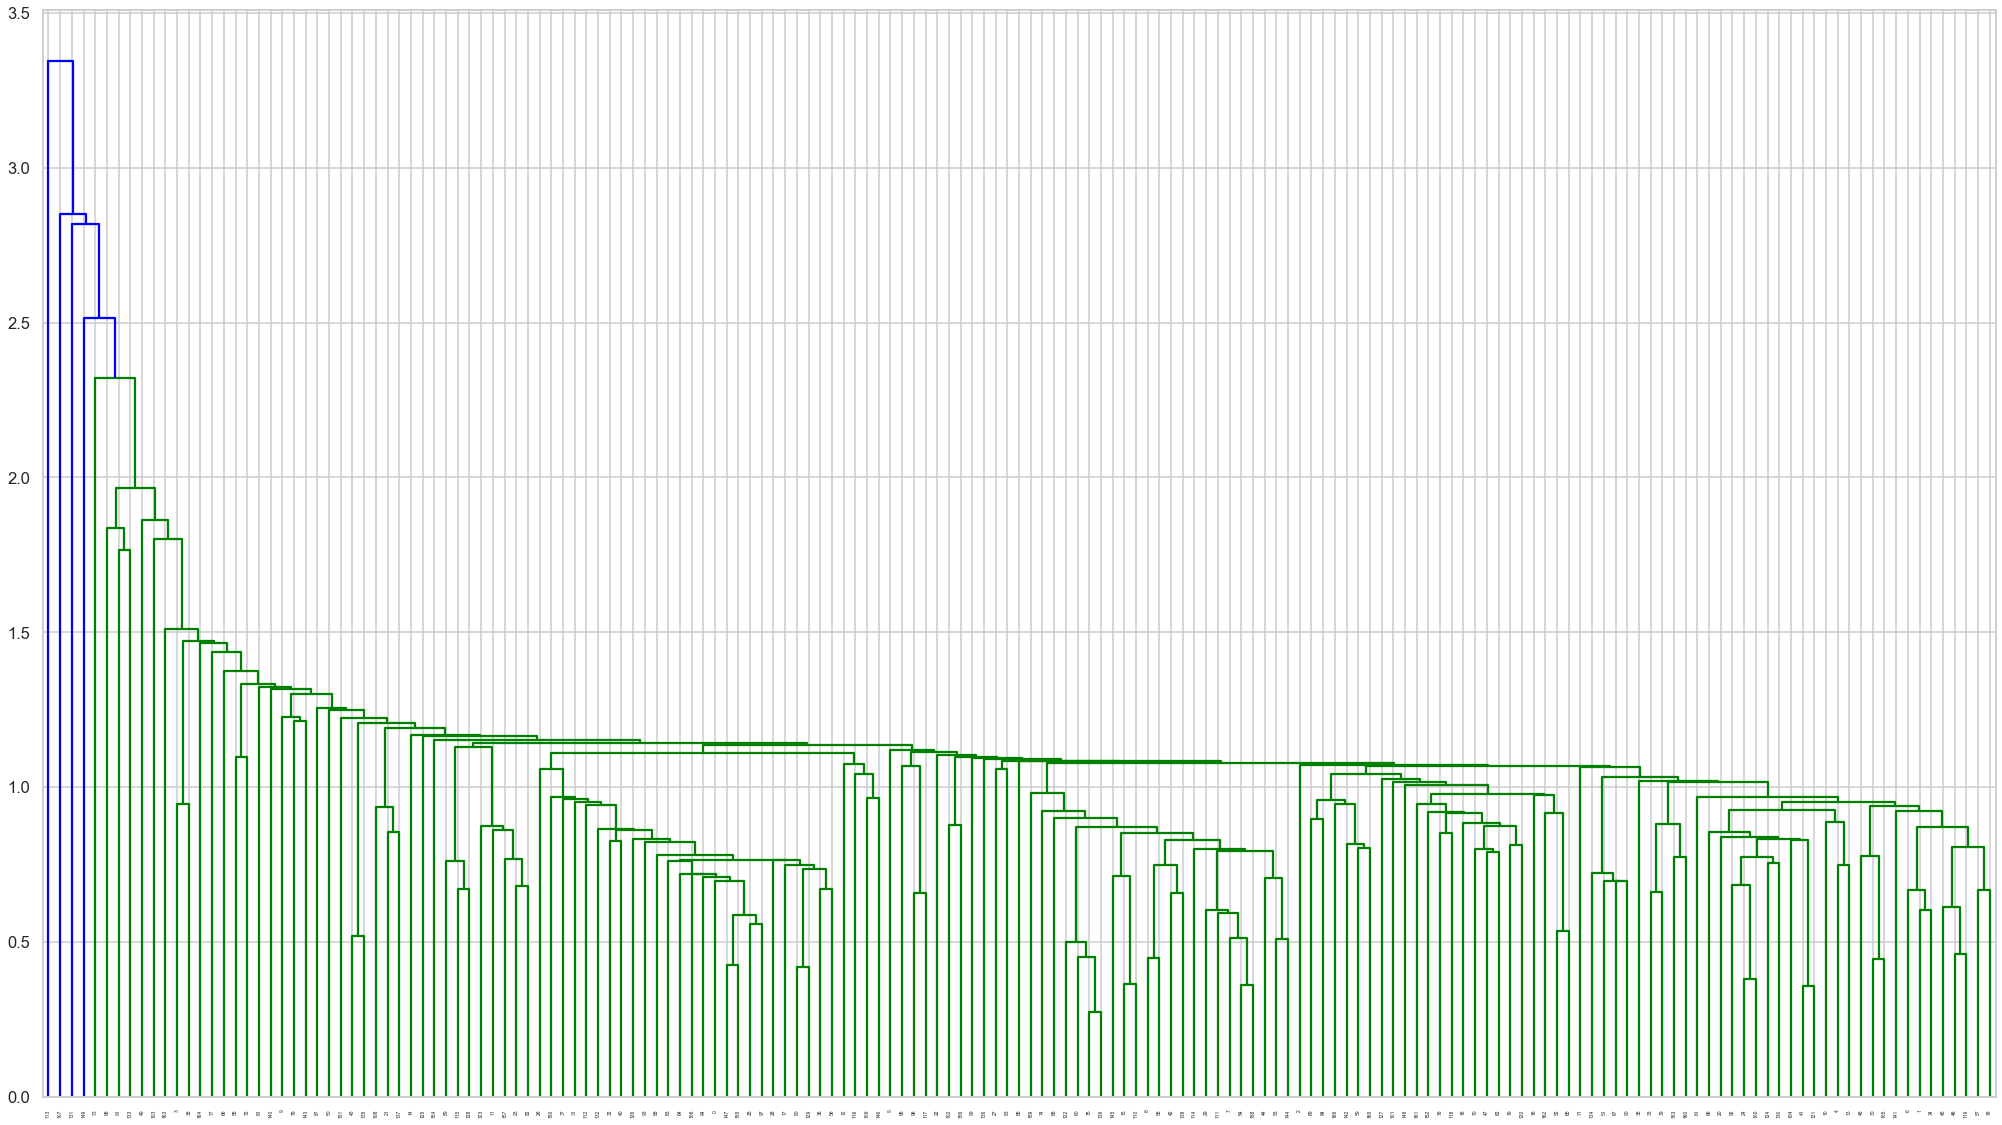

In [38]:
# single linkage

plt.figure(figsize=(35,20))
mergings = linkage(hierarchical_clus, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

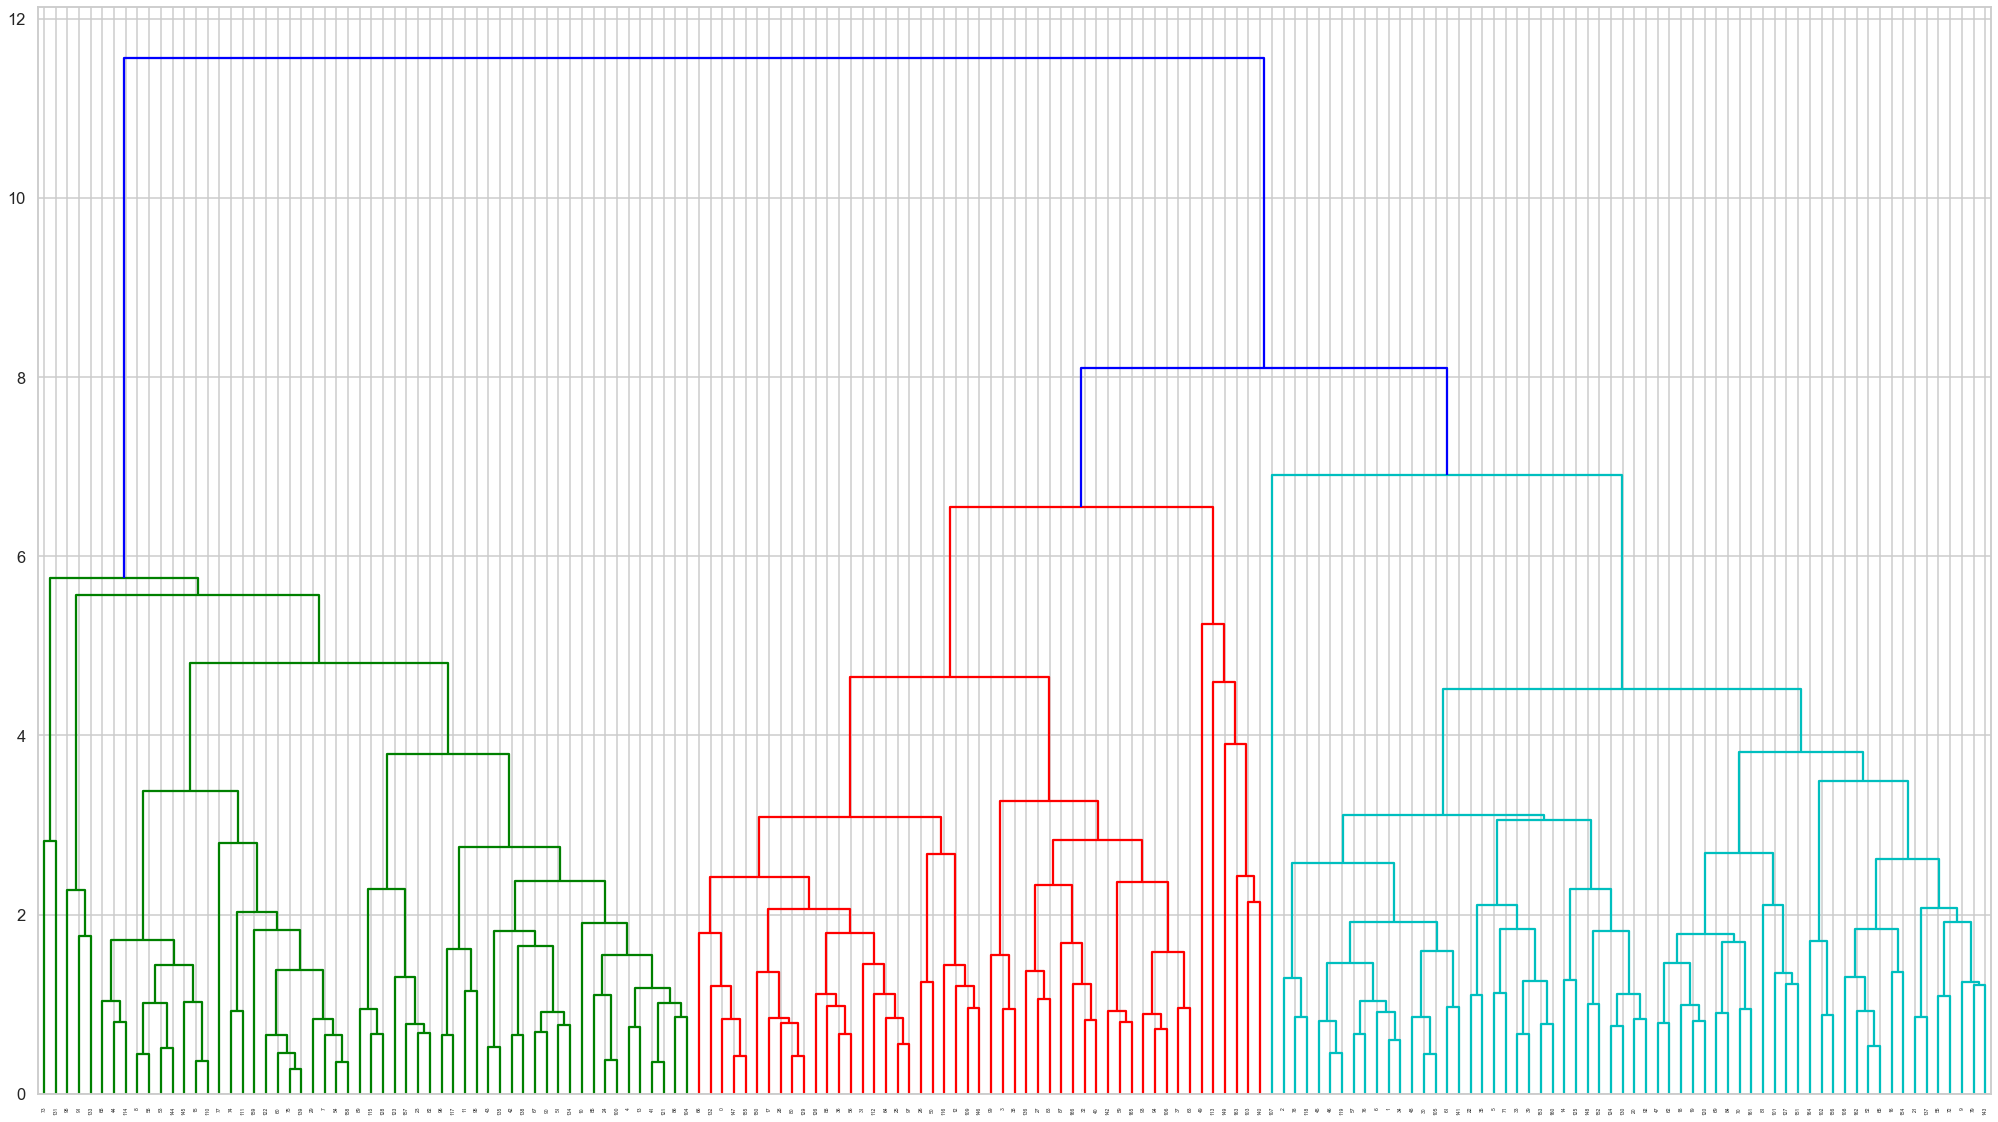

In [39]:
# complete linkage

plt.figure(figsize=(35,20))
mergings_comp = linkage(hierarchical_clus, method="complete", metric='euclidean')
dendrogram(mergings_comp)
plt.show()

Let us cut the dendrogram such that n_clusters = 3

In [40]:
# Assigning the no of clusters
cluster_labels = cut_tree(mergings_comp, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 0, 1, 2, 2, 0,
       0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 1, 0, 2, 1, 0, 1, 1, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2,
       0, 2, 2, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 0, 1, 0, 0])

In [41]:
# Assign cluster labels

hierarchical_clus['cluster_id'] = cluster_labels
hierarchical_clus.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
country,,,,,,,,,,
Afghanistan,1.266699,-1.671164,-1.239313,-1.246055,-1.421814,0.459416,-1.526455,1.544053,-1.462273,0
Albania,-0.220994,-0.380078,-0.042924,-0.055108,-0.063615,-0.154659,0.621738,-0.992833,-0.121133,1
Algeria,0.217834,0.105605,-0.270052,-0.266188,0.065692,1.059790,0.652698,0.313175,-0.063195,1
Angola,1.506186,0.943040,-0.661987,-0.219429,-0.308958,1.512843,-1.239045,1.623128,-0.219666,0
Antigua and Barbuda,-0.637380,0.385850,0.563269,0.758134,0.594623,-0.723442,0.699553,-0.368063,0.609228,2


In [42]:
hierarchical_clus.cluster_id.value_counts()

1    62
2    56
0    49
Name: cluster_id, dtype: int64

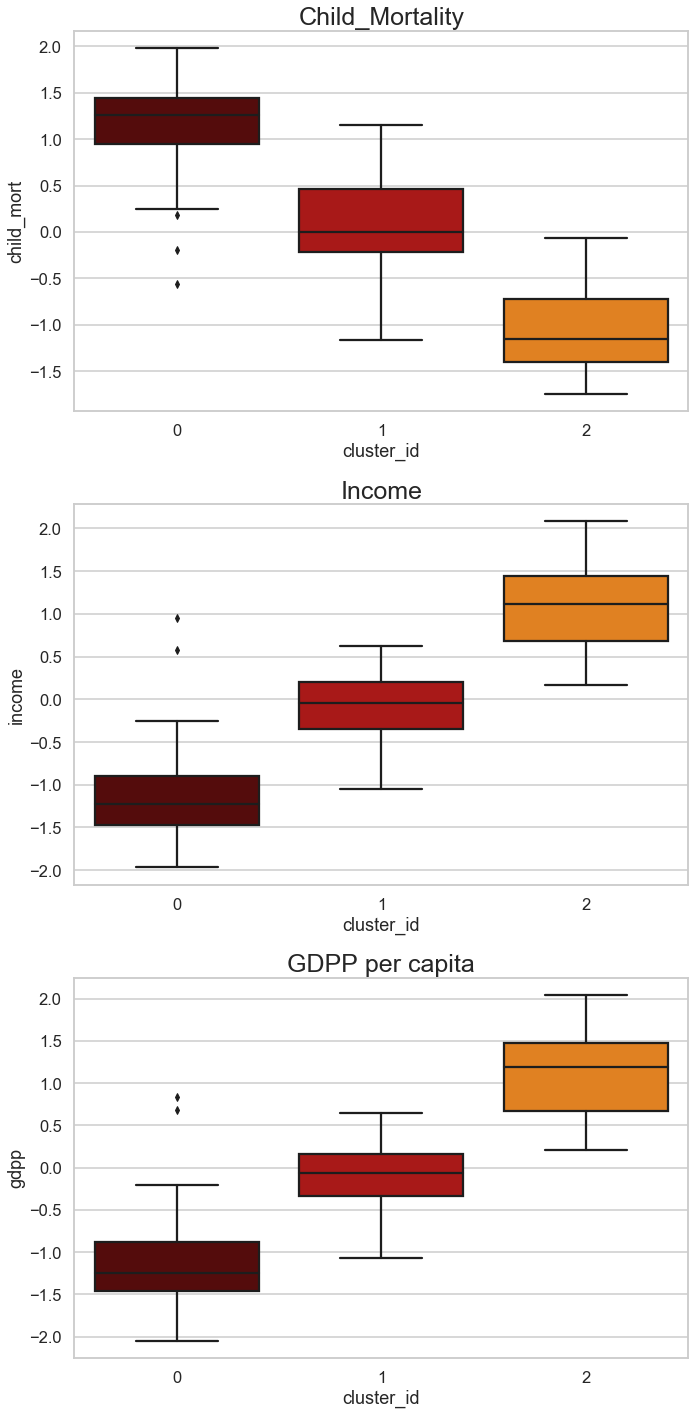

In [43]:
# Plot boxplot for child_mort, income and gdpp variables 

plt.figure(figsize=(10,20))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')


plt.subplot(3,1,1)                        
plt.title('Child_Mortality',fontsize=25)   

sns.boxplot(x=hierarchical_clus['cluster_id'],y=hierarchical_clus['child_mort'],data=hierarchical_clus,palette='gist_heat',orient='v',fliersize=5)


plt.subplot(3,1,2)                    
plt.title('Income',fontsize=25)          

sns.boxplot(x=hierarchical_clus['cluster_id'],y=hierarchical_clus['income'],data=hierarchical_clus,palette='gist_heat',orient='v',fliersize=5)

plt.subplot(3,1,3)                           
plt.title('GDPP per capita',fontsize=25)     


sns.boxplot(x=hierarchical_clus['cluster_id'],y=hierarchical_clus['gdpp'],data=hierarchical_clus,palette='gist_heat',orient='v',fliersize=5)
             
plt.tight_layout()

From the above boxplot we can conclude that

cluster id 0 : High child mortality and very less Income and GDPP when compared to other cluster id's

In [44]:
# To get the names of countries on cluster id 0

Country_aid_1=pd.DataFrame(hierarchical_clus[hierarchical_clus['cluster_id']==0].index)

Country_aid_1.shape

(49, 1)

In [45]:
# List of countries need aid as per the Hierarchical clustering

Country_aid_1.set_index('country')

""
country
Afghanistan
Angola
Bangladesh
Benin
Burkina Faso
Burundi
Cambodia
Cameroon
Central African Republic


### Insights from both clustering methods:

- By applying both K-Means and Hierarchical Clustering methods on the given dataset. We found 50 countries which need aid (K-Means Clustering) and 49 countries which need aid by performing (Hierarchical Clustering) respectively. we have done the experiment with the presence of outliers. If we exclude the outliers we may lose some important informations on the dataset. So we have executed the model with the presence of outliers.

- After analysing the both methods of clustering, I would choose to go with Hierarchical Clustering which results 49 countries as it gave more accurate numbers when compared to K-Means.

### Conclusion:

Hence with the given dataset we have read the data, performed data visualisation on it, data preparations and introduced the clustering methods on the scaled data.

After executing both K-Means and Hierarchical Clustering methods, we have found that the results from Hierarchical Clustering method is more accurate and also this method fulfills the business requirement. 

#### List of countries which needs aid immediately: 

- Afghanistan
- Angola
- Bangladesh
- Benin
- Burkina Faso
- Burundi
- Cambodia
- Cameroon
- Central African Republic
- Chad
- Comoros
- Congo, Dem. Rep.
- Congo, Rep.
- Cote d'Ivoire
- Equatorial Guinea
- Eritrea
- Gambia
- Ghana
- Guinea
- Guinea-Bissau
- Haiti
- Kenya
- Kyrgyz Republic
- Lesotho
- Liberia
- Madagascar
- Malawi
- Mali
- Mauritania
- Mongolia
- Mozambique
- Nepal
- Niger
- Nigeria
- Pakistan
- Rwanda
- Senegal
- Sierra Leone
- Solomon Islands
- Sri Lanka
- Sudan
- Tajikistan
- Tanzania
- Timor-Leste
- Togo
- Uganda
- Venezuela
- Yemen
- Zambia
